In [252]:
import sys
import itertools


class IntcodeMachine:
    def __init__(self, data):
        self.memory = data
        self.memory[0] =2
        self.pointer = 0
        self.size = len(data)
        self.out = 0
        self.halt = False
        self.initialized = False
        self.relBase = 0
        self.results = []
        #self.commands = [65, 44, 66, 44, 65, 44, 65, 44, 66, 44, 67, 44, 66, 44, 67, 44, 67, 44, 66, 44, 10,76, 44, 12, 44, 82, 44, 8, 44, 76, 44, 6, 44, 82, 44, 8, 44, 76, 44, 6, 44, 10,82, 44, 8, 44, 76, 44, 12, 44, 76, 44, 12, 44, 82, 44, 8, 44, 10,76, 44, 6, 44, 82, 44, 6, 44, 76, 44, 12, 44, 10, 110, 10]
        self.commands = list(map(lambda c: (ord(c)),
            "A,B,A,A,B,C,B,C,C,B\n" 
            "L,12,R,8,L,6,R,8,L,6\n"       
            "R,8,L,12,L,12,R,8\n"       
            "L,6,R,6,L,12\n" 
            "n\n"                   
        ))
        self.track = 0

        
    def process(self, inputArg = None):
        if inputArg != None:  
            self.initialized = True
        
        while self.pointer < self.size:
            opcode = int(str(self.memory[self.pointer])[-2:])
            paramModes = str(self.memory[self.pointer])[:-2]
            if (opcode == 99): # HALT
                self.halt = True
                print('halt')
                break
            elif (opcode == 1): # OPCODE 01 - Sum
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) + self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 2): # OPCODE 02 - Multiply
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) * self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 3):  # OPCODE 03 - Input
                if inputArg != None:
                    self.__setParam(paramModes, 1, inputArg)
                    inputArg = None
                else:
                    if VERBOSE:
                        if self.track == 0:
                            print('Sending inputs now')
                        self.__setParam(paramModes, 1, self.commands[self.track])
                        self.track += 1
                    else:
                        break
                self.pointer += 2
            elif (opcode == 4):  # OPCODE 04 - Print
                out = self.__getParam(paramModes,1)
                if VERBOSE:
                    print(">> " + str(out))
                    self.results.append(out)
                self.out = out
                self.pointer += 2
            # Start of part 2
            elif (opcode == 5):  # OPCODE 05 - JNZ (jump if not zero)
                if (self.__getParam(paramModes,1) != 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 6):  # OPCODE 06 - JZ (jump if zero)
                if (self.__getParam(paramModes,1) == 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 7):  # OPCODE 07 - Set 1 if first is less than second else 0
                if (self.__getParam(paramModes,1) < self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif (opcode == 8):  # OPCODE 08 - Set 1 if first is equal to second else 0
                if (self.__getParam(paramModes,1) == self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif opcode == 9:
                self.relBase += self.__getParam(paramModes,1)
                self.pointer += 2
            else:
                print(str(self.memory[self.pointer]) + " Something went wrong :(")
                break

    def __getParam(self, paramModes, param):
        return self.memory[self.__getParamAddress(paramModes, param)]

    def __setParam(self, paramModes, param, value):
        self.memory[self.__getParamAddress(paramModes, param)] = value
    
    def __getParamAddress(self, paramModes, param):
        type = 0
        try:
            type = int(paramModes[-param])
        except:
            pass
        if type == 0:
            return self.memory[self.pointer + param]
        elif type == 1:
            return self.pointer + param
        elif type == 2:
            offset = self.memory[self.pointer + param]
            return self.relBase + offset
        else:
            print('Param type error')
            return 0

VERBOSE =True
data = list(map(lambda x: int(x), open('./input-17.txt', "r").read().split(','))) + [0 for i in range(10000)]
machine = IntcodeMachine(data)
machine.process()



>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 4

>> 35
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 94
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 4

>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 4

>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 10
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 35
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 46
>> 4

In [50]:
machine.results[61]

10

In [75]:
from collections import defaultdict
print(len(machine.results))
lines = defaultdict(list)
linecount=0
for x in machine.results:
    if x == 10:
        linecount+=1
    if x==46:
        note = '.'
        lines[linecount].append(note)
    if x==35:
        note = '#'
        lines[linecount].append(note)
    elif x!=35 and x!=10 and x!=46:
        print(x,chr(94))
        note = chr(x)
        lines[linecount].append(note)

3783
94 ^


In [76]:
(3783-63)/62

60.0

In [77]:
len(lines)

61

In [ ]:
for n in lines.keys():
    print(''.join(lines[n]))

In [91]:
import numpy as np
grid = np.zeros((61,63))

for n in lines.keys():
    for xpos, x in enumerate(lines[n]):
        if x=='#':
            grid[xpos,n] =-1
        elif x=='.':
            grid[xpos,n] =0
        elif x=='^':
            grid[xpos,n] =5


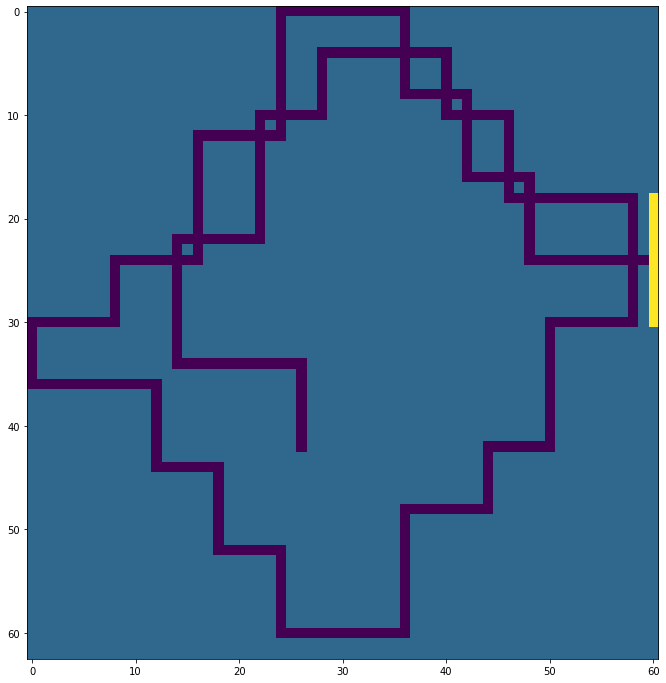

In [113]:
plt.figure(figsize=(12,12))
plt.imshow(grid.T)

In [107]:
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
x,y = np.where(grid==5)
x,y

(array([60]), array([24]))

In [164]:
import numpy as np
grid = np.zeros((61,63))

for n in lines.keys():
    for xpos, x in enumerate(lines[n]):
        if x=='#':
            grid[xpos,n] =-1
        elif x=='.':
            grid[xpos,n] =0
        elif x=='^':
            grid[xpos,n] =5


            
x,y = np.where(grid==5)


moves = ['L12','R8','L6','R8','L6','R8','L12','L12','R8','L12','R8','L6','R8','L6','L12','R8','L6','R8','L6','R8','L12','L12','R8','L6','R6','L12','R8','L12','L12','R8','L6','R6','L12','L6','R6','L12','R8','L12','L12','R8']

compass = {0:'north',1:'east',2:'south',3:'west'}

facing = 0
current_pos = [x[0],y[0]]
for m in moves:
    amt=int(m[1:])
    if m[0]=='L':
        facing+=1
    elif m[0] =='R':
        facing-=1
    facing %= 4
    
    #print(compass[facing])
    
    if facing ==0:
        dx=0
        dy=-amt
        grid[current_pos[0]:current_pos[0]+1,current_pos[1]-amt:current_pos[1]] = 2


    if facing ==1:
        dx=-amt
        dy=0
        grid[current_pos[0]-amt:current_pos[0],current_pos[1]:current_pos[1]+1] = 2

    if facing ==2:
        dx=0
        dy=amt
        grid[current_pos[0]:current_pos[0]+1,current_pos[1]:current_pos[1]+amt] = 2


    if facing == 3:
        dx=amt
        dy=0
        grid[current_pos[0]:current_pos[0]+amt,current_pos[1]:current_pos[1]+1] = 2



    current_pos[0] = current_pos[0]+dx
    current_pos[1] = current_pos[1]+dy
    

In [165]:
-1%4

3

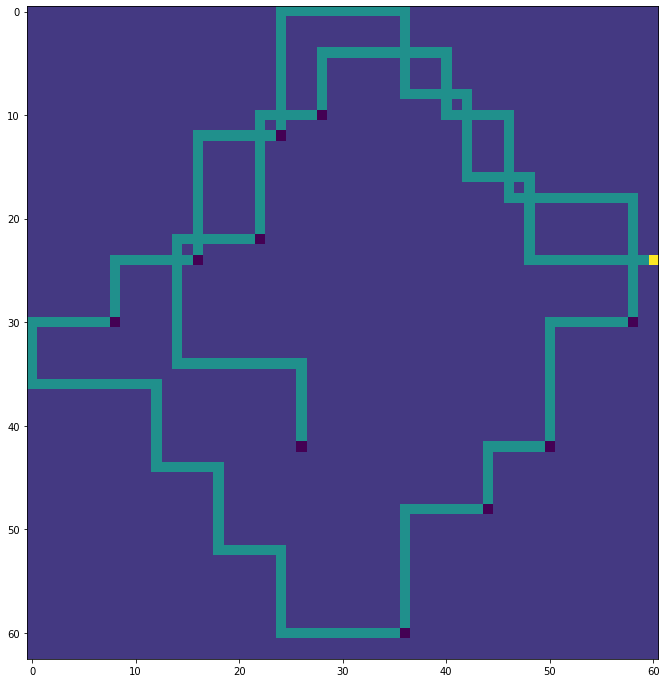

In [166]:
plt.figure(figsize=(12,12))
plt.imshow(grid.T)

In [186]:
#moves = ['L12','R8','L6','R8','L6','R8','L12','L12','R8','L12','R8','L6','R8','L6','L12','R8','L6','R8','L6','R8','L12','L12','R8','L6','R6','L12','R8','L12','L12','R8','L6','R6','L12','L6','R6','L12','R8','L12','L12','R8']

moves = ['L12','R08','L06','R08','L06','R08','L12','L12','R08','L12','R08','L06','R08','L06','L12','R08','L06','R08','L06','R08','L12','L12','R08','L06','R06','L12','R08','L12','L12','R08','L06','R06','L12','L06','R06','L12','R08','L12','L12','R08']




In [207]:
while True:
    total = ''.join(moves)
    replacements = {}

    for funcs in ['A','B','C']:
        to = np.random.randint(0,len(total)//3)
        to2 = np.random.randint(0,len(total)//3)
        
        canid = total.replace('A','').replace('B','').replace('C','')[min((to,to2))*3:max((to,to2))*3]
        if len(canid) >= 20:
            break
        replacements[funcs] = canid
        total = total.replace(canid,funcs)
        
    final_str = total.replace('A','').replace('B','').replace('C','')
    if len(total) <= 20 and len(final_str) ==0:
        print(total)
        print(replacements)
        break
    


ABAABCBCCB
{'A': 'L12R08L06R08L06', 'B': 'R08L12L12R08', 'C': 'L06R06L12'}


In [ ]:
{'A': 'L12R08L06R08L06', 'B': 'R08L12L12R08', 'C': 'L06R06L12'}


In [241]:
total = ''.join(moves)


ans = 'ABAABCBCCB'.replace('A','L12R08L06R08L06').replace('B','R08L12L12R08').replace('C','L06R06L12')

ans == total

True

In [234]:
#prepare my inputs:
numbers = []
for c in 'ABAABCBCCB':
    numbers.append(ord(c))
    numbers.append(44)
    
numbers.append(10)

numbers

[65,
 44,
 66,
 44,
 65,
 44,
 65,
 44,
 66,
 44,
 67,
 44,
 66,
 44,
 67,
 44,
 67,
 44,
 66,
 44,
 10]

In [229]:
#rountine A: 

route_a = 'L12R08L06R08L06'
numbers = []

for i in range(0,len(route_a)//3):
    x = route_a[i*3:(i+1)*3]
    print(x)
    numbers.append(ord(x[0]))
    numbers.append(44)
    numbers.append(int(x[1:3]))
    numbers.append(44)


numbers.append(10)
numbers

L12
R08
L06
R08
L06


[76,
 44,
 12,
 44,
 82,
 44,
 8,
 44,
 76,
 44,
 6,
 44,
 82,
 44,
 8,
 44,
 76,
 44,
 6,
 44,
 10]

In [230]:
#rountine B: 

route_a = 'R08L12L12R08'
numbers = []

for i in range(0,len(route_a)//3):
    x = route_a[i*3:(i+1)*3]
    print(x)
    numbers.append(ord(x[0]))
    numbers.append(44)
    numbers.append(int(x[1:3]))
    numbers.append(44)


numbers.append(10)
numbers

R08
L12
L12
R08


[82, 44, 8, 44, 76, 44, 12, 44, 76, 44, 12, 44, 82, 44, 8, 44, 10]

In [231]:
#rountine C: 

route_a = 'L06R06L12'
numbers = []

for i in range(0,len(route_a)//3):
    x = route_a[i*3:(i+1)*3]
    print(x)
    numbers.append(ord(x[0]))
    numbers.append(44)
    numbers.append(int(x[1:3]))
    numbers.append(44)


numbers.append(10)
numbers

L06
R06
L12


[76, 44, 6, 44, 82, 44, 6, 44, 76, 44, 12, 44, 10]

In [233]:
[ord('n'),10]

[110, 10]

In [237]:
[65, 44, 66, 44, 65, 44, 65, 44, 66, 44, 67, 44, 66, 44, 67, 44, 67, 44, 66, 44, 10]
[76, 44, 12, 44, 82, 44, 8, 44, 76, 44, 6, 44, 82, 44, 8, 44, 76, 44, 6, 44, 10]
[82, 44, 8, 44, 76, 44, 12, 44, 76, 44, 12, 44, 82, 44, 8, 44, 10]
[76, 44, 6, 44, 82, 44, 6, 44, 76, 44, 12, 44, 10]
[110, 10]



SyntaxError: invalid syntax (<ipython-input-237-c31ef0e1cf09>, line 22)

In [245]:
commands = [65, 44, 66, 44, 65, 44, 65, 44, 66, 44, 67, 44, 66, 44, 67, 44, 67, 44, 66, 44, 10,76, 44, 12, 44, 82, 44, 8, 44, 76, 44, 6, 44, 82, 44, 8, 44, 76, 44, 6, 44, 10,82, 44, 8, 44, 76, 44, 12, 44, 76, 44, 12, 44, 82, 44, 8, 44, 10,76, 44, 6, 44, 82, 44, 6, 44, 76, 44, 12, 44, 10, 110, 10]




In [243]:
mycommands = list(map(lambda c: (ord(c)),
	"A,B,A,A,B,C,B,C,C,B\n" 
	"L,12,R,8,L,6,R,8,L,6\n"       
	"R,8,L,12,L,12,R,8\n"       
	"L,6,R,6,L,12\n" 
	"n\n"                   
))

In [246]:
mycommands == commands

False

In [251]:
for pos,(x,y) in enumerate(zip(mycommands,commands)):
    if x!=y:
        print(pos,x,y)

19 10 44
20 76 10
21 44 76
22 49 44
23 50 12
27 56 8
31 54 6
35 56 8
39 54 6
40 10 44
41 82 10
42 44 82
43 56 44
44 44 8
45 76 44
46 44 76
47 49 44
48 50 12
52 49 12
53 50 44
54 44 82
55 82 44
56 44 8
57 56 44
61 54 6
65 54 6
69 49 12
70 50 44


In [206]:
'BABBACL12ACL12CL12A'

'L12L12L12'

for n in lines.keys():
    print(''.join(lines[n]))

In [55]:
machine.results[-5:]

[46, 46, 46, 10, 10]

In [64]:
intersections = []
total = 0
for n in lines.keys():
    #print(''.join(lines[n]))
    #print(len(lines[n]))
    for xpos, x in enumerate(lines[n]):
        try:
            if x == '#' and lines[n][xpos-1] == '#' and lines[n][xpos+1] == '#' and lines[n+1][xpos] == '#' and lines[n-1][xpos] == '#':
                print(xpos,n)
                intersections.append([xpos,n])
                total += xpos*n
        except:
            pass
    

36 4
40 8
24 10
42 10
22 12
46 16
48 18
16 22
14 24
58 24


In [65]:
total

5068

In [66]:
scaffs = []
for n in lines.keys():
    for xpos, x in enumerate(lines[n]):
        if x=='#':
            scaffs.append((xpos,n))

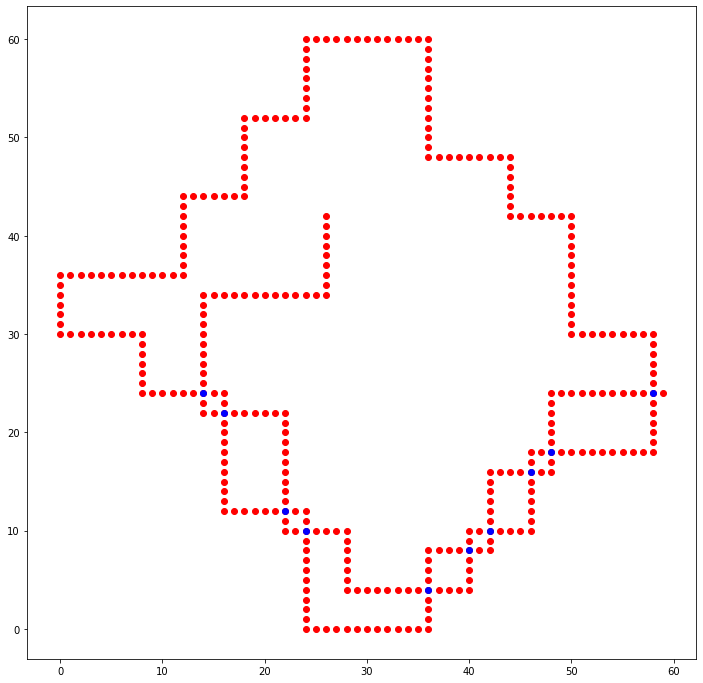

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
for s in scaffs:
    plt.scatter(s[0],s[1],c='r')
for s in intersections:
    plt.scatter(s[0],s[1],c='b')

In [ ]:
# hand wrote these:



In [80]:
MOVES = ['L12','R8','L6','R8','L6','R8','L12','L12','R8','L12','R8','L6','R8','L6','L12','R8','L6','R8','L6','R8','L12','L12','R8','L6','R8','L12','R8','L12','L12','R8','L6','R8','L12','L6','R8','L12','R8','L12','L12','R8']